In [37]:
import numpy as np
import matplotlib.pyplot as plt
s = 15 #stock price at time 0 in euro
u = 1.05 #up multiplier
d = 0.79 #down multiplier
T = 10 #maturity time
K = 8 #strike price
r1 = 0.045/365 #daily interest rate; 1+r1 multiplier, not exp(r1)
q = (1+r1-d)/(u-d) #risk neutral probability for up


In [38]:
# Determine possible stock prices up to maturity
stockprice = np.full((T+1,T+1),np.nan)
stockprice[0,0] = s
for j in range(1,T+1):
    for i in range(0,j):
        stockprice[i,j] = stockprice[i,j-1]*u
        stockprice[i+1,j] = stockprice[i,j-1]*d
print("Stock prices:")
print(np.around(stockprice, 2)) #just for visualisation

Stock prices:
[[15.   15.75 16.54 17.36 18.23 19.14 20.1  21.11 22.16 23.27 24.43]
 [  nan 11.85 12.44 13.06 13.72 14.4  15.12 15.88 16.67 17.51 18.38]
 [  nan   nan  9.36  9.83 10.32 10.84 11.38 11.95 12.55 13.17 13.83]
 [  nan   nan   nan  7.4   7.77  8.15  8.56  8.99  9.44  9.91 10.41]
 [  nan   nan   nan   nan  5.84  6.13  6.44  6.76  7.1   7.46  7.83]
 [  nan   nan   nan   nan   nan  4.62  4.85  5.09  5.34  5.61  5.89]
 [  nan   nan   nan   nan   nan   nan  3.65  3.83  4.02  4.22  4.43]
 [  nan   nan   nan   nan   nan   nan   nan  2.88  3.02  3.18  3.33]
 [  nan   nan   nan   nan   nan   nan   nan   nan  2.28  2.39  2.51]
 [  nan   nan   nan   nan   nan   nan   nan   nan   nan  1.8   1.89]
 [  nan   nan   nan   nan   nan   nan   nan   nan   nan   nan  1.42]]


In [39]:
# Determine European call option prices and conditional values
calloption = np.full((T+1,T+1),np.nan)
calloption[:,-1] = np.where(stockprice[:,-1]-K<0,0,stockprice[:,-1]-K)
for j in range(T-1,-1,-1):
    for i in range(0,j+1):
        calloption[i,j] = (q*calloption[i,j+1]+(1-q)*calloption[i+1,j+1])/(1+r1)
print("Call option prices:")
print(np.around(calloption, 2)) #just for visualisation

Call option prices:
[[ 7.09  7.81  8.57  9.38 10.24 11.15 12.11 13.11 14.16 15.27 16.43]
 [  nan  4.07  4.59  5.16  5.77  6.43  7.13  7.88  8.68  9.51 10.38]
 [  nan   nan  1.89  2.21  2.58  2.99  3.46  3.98  4.55  5.17  5.83]
 [  nan   nan   nan  0.54  0.67  0.83  1.03  1.27  1.57  1.94  2.41]
 [  nan   nan   nan   nan  0.    0.    0.    0.    0.    0.    0.  ]
 [  nan   nan   nan   nan   nan  0.    0.    0.    0.    0.    0.  ]
 [  nan   nan   nan   nan   nan   nan  0.    0.    0.    0.    0.  ]
 [  nan   nan   nan   nan   nan   nan   nan  0.    0.    0.    0.  ]
 [  nan   nan   nan   nan   nan   nan   nan   nan  0.    0.    0.  ]
 [  nan   nan   nan   nan   nan   nan   nan   nan   nan  0.    0.  ]
 [  nan   nan   nan   nan   nan   nan   nan   nan   nan   nan  0.  ]]


## 4-a

In [40]:
def european_call_option_price(s, u, d, T, K, r1):
    q = (1 + r1 - d) / (u - d)  # risk neutral probability for up
    stockprice = np.full((T + 1, T + 1), np.nan)
    stockprice[0, 0] = s
    
    # Determine possible stock prices up to maturity
    for j in range(1, T + 1):
        for i in range(0, j):
            stockprice[i, j] = stockprice[i, j - 1] * u
            stockprice[i + 1, j] = stockprice[i, j - 1] * d
    
    # Determine European call option prices and conditional values
    calloption = np.full((T + 1, T + 1), np.nan)
    calloption[:, -1] = np.where(stockprice[:, -1] - K < 0, 0, stockprice[:, -1] - K)
    
    for j in range(T - 1, -1, -1):
        for i in range(0, j + 1):
            calloption[i, j] = (q * calloption[i, j + 1] + (1 - q) * calloption[i + 1, j + 1]) / (1 + r1)
    
    return calloption[0, 0]  # return the price of the option at time 0

### Call prices for d at 0.90

In [41]:
d_fixed_90 = 0.90
u_values = [1.02, 1.03, 1.05, 1.11]  # up multipliers
call_prices_90 = [european_call_option_price(s, u, d_fixed_90, T, K, r1) for u in u_values]
print(call_prices_90)


[np.float64(7.009972748413844), np.float64(7.010420918843833), np.float64(7.013167541912111), np.float64(7.0383372617458475)]


### Call prices for d at 0.975

In [42]:
d_fixed_795 = 0.795
call_prices_795 = [european_call_option_price(s, u, d_fixed_795, T, K, r1) for u in u_values]
print(call_prices_795)

[np.float64(7.021664770056795), np.float64(7.042976271925081), np.float64(7.07660346572181), np.float64(7.267704502861059)]


### The graph to visualize the variation of our call prices

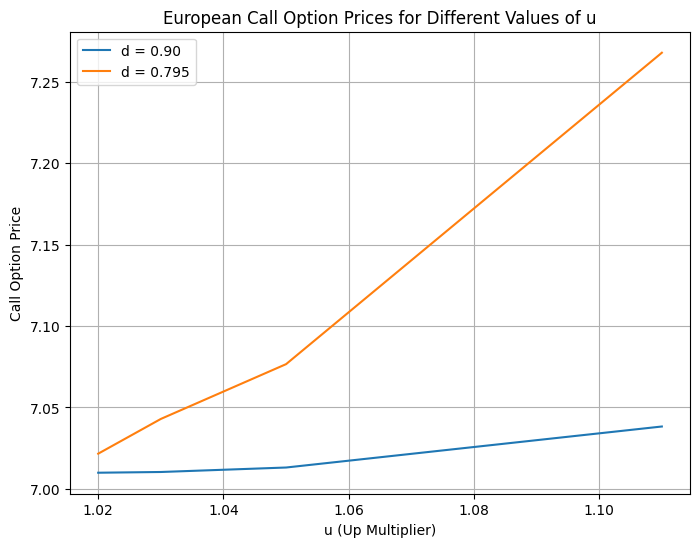

In [43]:
plt.figure(figsize=(8, 6))
plt.plot(u_values, call_prices_90, label='d = 0.90')
plt.plot(u_values, call_prices_795, label='d = 0.795')
plt.title('European Call Option Prices for Different Values of u')
plt.xlabel('u (Up Multiplier)')
plt.ylabel('Call Option Price')
plt.legend()
plt.grid(True)
plt.show()

## 4-b

### relation between call price and u

As the value of u increases, the call option price also increases.

### relation between call price and d

As the value of d decreases, the call option price increases. 

### Intuitive Explanation

The price of a call option is fundamentally tied to the potential upside of the underlying stock.
#### u:
Higher u: The greater the potential for the stock to increase, the more valuable the call option becomes, because the option allows the holder to buy the stock at a fixed price K. A larger u means there is a higher chance of a large positive payoff.

#### d:
The less the stock price is likely to decrease, the more protected the option holder is from downside risk. A smaller d means that the stock price is less likely to fall significantly below the strike price, making the option more valuable since the stock is more likely to remain at or above K.

## 4-c

In [44]:
def european_put_option_price(s, u, d, T, K, r1):
    q = (1 + r1 - d) / (u - d)  # risk neutral probability for up
    stockprice = np.full((T + 1, T + 1), np.nan)
    stockprice[0, 0] = s
    
    # Determine possible stock prices up to maturity
    for j in range(1, T + 1):
        for i in range(0, j):
            stockprice[i, j] = stockprice[i, j - 1] * u
            stockprice[i + 1, j] = stockprice[i, j - 1] * d
    
    # Determine European put option prices and conditional values
    putoption = np.full((T + 1, T + 1), np.nan)
    putoption[:, -1] = np.where(K - stockprice[:, -1] < 0, 0, K - stockprice[:, -1])
    
    for j in range(T - 1, -1, -1):
        for i in range(0, j + 1):
            putoption[i, j] = (q * putoption[i, j + 1] + (1 - q) * putoption[i + 1, j + 1]) / (1 + r1)
    
    return putoption[0, 0]  # return the price of the option at time 0

### put prices for d at 0.90

In [45]:
d_fixed_90 = 0.90
u_values = [1.02, 1.03, 1.05, 1.11]
put_prices_90 = [european_put_option_price(s, u, d_fixed_90, T, K, r1) for u in u_values]


### put prices for d at 0.795

In [46]:
d_fixed_795 = 0.795
put_prices_795 = [european_put_option_price(s, u, d_fixed_795, T, K, r1) for u in u_values]


### The graph to visualize the variation of our put prices

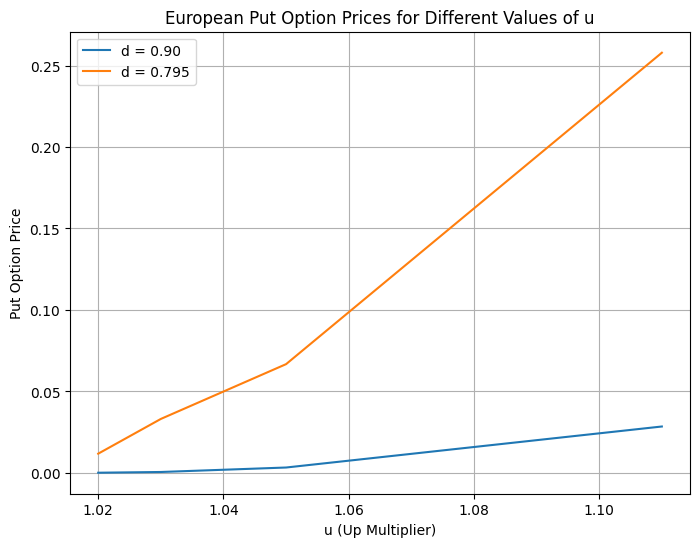

In [47]:
plt.figure(figsize=(8, 6))
plt.plot(u_values, put_prices_90, label='d = 0.90')
plt.plot(u_values, put_prices_795, label='d = 0.795')
plt.title('European Put Option Prices for Different Values of u')
plt.xlabel('u (Up Multiplier)')
plt.ylabel('Put Option Price')
plt.legend()
plt.grid(True)
plt.show()

## 4-d

In [48]:
putoption = np.full((T + 1, T + 1), np.nan)
putoption[:, -1] = np.where(K - stockprice[:, -1] < 0, 0, K - stockprice[:, -1])
for j in range(T - 1, -1, -1):
    for i in range(0, j + 1):
        putoption[i, j] = (q * putoption[i, j + 1] + (1 - q) * putoption[i + 1, j + 1]) / (1 + r1)

print("Put option prices:")
print(np.around(putoption, 2)) 

Put option prices:
[[0.08 0.05 0.03 0.01 0.01 0.   0.   0.   0.   0.   0.  ]
 [ nan 0.21 0.14 0.08 0.05 0.02 0.01 0.   0.   0.   0.  ]
 [ nan  nan 0.52 0.37 0.25 0.15 0.08 0.03 0.01 0.   0.  ]
 [ nan  nan  nan 1.14 0.9  0.67 0.46 0.28 0.13 0.03 0.  ]
 [ nan  nan  nan  nan 2.15 1.86 1.55 1.23 0.9  0.54 0.17]
 [ nan  nan  nan  nan  nan 3.38 3.15 2.91 2.65 2.39 2.11]
 [ nan  nan  nan  nan  nan  nan 4.35 4.17 3.98 3.78 3.57]
 [ nan  nan  nan  nan  nan  nan  nan 5.12 4.97 4.82 4.67]
 [ nan  nan  nan  nan  nan  nan  nan  nan 5.72 5.61 5.49]
 [ nan  nan  nan  nan  nan  nan  nan  nan  nan 6.2  6.11]
 [ nan  nan  nan  nan  nan  nan  nan  nan  nan  nan 6.58]]


In [49]:
for n in range(T + 1):
    for i in range(n + 1):
        Cn = calloption[i, n]
        Pn = putoption[i, n]
        Sn = stockprice[i, n]
        parity_lhs = Cn - Pn  # Left-hand side of put-call parity
        parity_rhs = Sn - np.exp(-r1 * (T - n)) * K  # Right-hand side of put-call parity
        
        print(f"n={n}, i={i}: Put-Call Parity LHS (C_n - P_n): {parity_lhs:.4f}, "
              f"RHS (S_n - exp(-r*(T-n))*K): {parity_rhs:.4f}")

n=0, i=0: Put-Call Parity LHS (C_n - P_n): 7.0099, RHS (S_n - exp(-r*(T-n))*K): 7.0099
n=1, i=0: Put-Call Parity LHS (C_n - P_n): 7.7589, RHS (S_n - exp(-r*(T-n))*K): 7.7589
n=1, i=1: Put-Call Parity LHS (C_n - P_n): 3.8589, RHS (S_n - exp(-r*(T-n))*K): 3.8589
n=2, i=0: Put-Call Parity LHS (C_n - P_n): 8.5454, RHS (S_n - exp(-r*(T-n))*K): 8.5454
n=2, i=1: Put-Call Parity LHS (C_n - P_n): 4.4504, RHS (S_n - exp(-r*(T-n))*K): 4.4504
n=2, i=2: Put-Call Parity LHS (C_n - P_n): 1.3694, RHS (S_n - exp(-r*(T-n))*K): 1.3694
n=3, i=0: Put-Call Parity LHS (C_n - P_n): 9.3713, RHS (S_n - exp(-r*(T-n))*K): 9.3713
n=3, i=1: Put-Call Parity LHS (C_n - P_n): 5.0715, RHS (S_n - exp(-r*(T-n))*K): 5.0715
n=3, i=2: Put-Call Parity LHS (C_n - P_n): 1.8365, RHS (S_n - exp(-r*(T-n))*K): 1.8365
n=3, i=3: Put-Call Parity LHS (C_n - P_n): -0.5975, RHS (S_n - exp(-r*(T-n))*K): -0.5975
n=4, i=0: Put-Call Parity LHS (C_n - P_n): 10.2385, RHS (S_n - exp(-r*(T-n))*K): 10.2385
n=4, i=1: Put-Call Parity LHS (C_n - P_